In [ ]:
'''
# 신경망(뉴럴 네트워크) : 인간의 신경망을 본따 만든 네트워크 구조
- 입력하면 데이터들이 입력층, 중간층(은폐층), 출력층을 지나며 처리가 일어나고 최종적인 결과가 출력
- 신경망을 3개 이상 중첩하면 “깊은 신경망(Deep Neural Network: DNN)”
- 깊은 신경망을 활용한 기계학습 => 딥러닝

# 퍼셉트론(Perceptron) : 입력층과 출력층만으로 구성된 인공 뉴런 -> 입력값들에 가중치를 적용하여 판단
# TensorFlow(텐서 플로우) : 다차원 행렬 계산으로 대규모 숫자 연산을 해주는 라이브러리

***** 작업을 위해 버전 낮추기 *****

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
+ python은 3.6~3.9 사용

'''

In [39]:
# TensorFlow 추출
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 상수 정의
a = tf.constant(1234)
b = tf.constant(5000)

# 계산 정의
add_op = a + b

# 세션 시작
sess = tf.Session()
res = sess.run(add_op) # 식 평가하기
print(res)

Instructions for updating:
non-resource variables are not supported in the long term
6234


In [44]:
# 상수 정의
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(4)
# 연산 정의
calc1_op = a + b + c
calc2_op = (a + b) *c
# 세션 시작
sess = tf.Session()
res1 = sess.run(calc1_op) # 식 평가하기
print(res1)
res2 = sess.run(calc2_op) # 식 평가하기
print(res2)

9
20


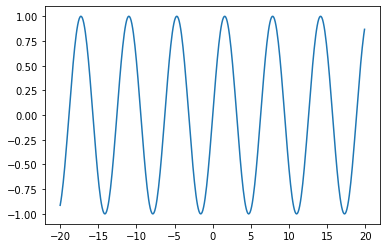

In [45]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-20, 20, 0.1)
y = np.sin(x)
plt.plot(x, y)

In [46]:
# a+b 연산
a = tf.constant(100)
b = tf.constant (50)
add_op = a + b
# 변수 v 선언하기
v = tf.Variable(0)
# 변수 v에 add_op의 결과 대입하기
let_op = tf.assign(v, add_op)
# 세션 시작하기
sess = tf.Session()
# 변수 초기화하기
sess.run(tf.global_variables_initializer())
# let_op 실행하기
sess.run(let_op)
# 출력하기
print(sess.run(v))

150


In [47]:
### tensorflow 플레이스홀더 기능
## 템플릿처럼 값을 넣을 공간을 만들어두는 기능

# 플레이스 홀더 정의
a = tf.placeholder(tf.int32, [3])
# [x,y,z] 세 개의 정수값을 가진 배열로 정의

# 배열의 모든 값을 2배로 하는 연산 정의
b = tf.constant(2)
x2_op = a * b

# 세션 시작
sess = tf.Session()

# 플레이스홀더에 값을 넣고 실행
r1 = sess.run(x2_op, feed_dict = {a:[1,2,3]})
print(r1)
r2 = sess.run(x2_op, feed_dict = {a:[10,20,30]})
print(r2)

[2 4 6]
[20 40 60]


In [48]:
### 플레이스홀더
# 정의
a = tf.placeholder(tf.int32, [None]) # 정수값을 가진 가변배열 정의

# 배열의 모든 값을 10배로 연산
b = tf.constant(10)
x10_op = a*b

# session 시작
sess = tf.Session()

# 플레이스홀더에 값 넣기
r1 = sess.run(x10_op, feed_dict={a:[1,2,3,4,5,6]})
print(r1)
r2 = sess.run(x10_op, feed_dict = {a:[10,20]})
print(r2)

[10 20 30 40 50 60]
[100 200]


In [3]:
# TensorFlow를 활용한 학습

import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

csv = pd.read_csv('data/bmi.csv')

# 데이터 정규화
csv['height'] = csv['height']/200
csv['weight'] = csv['weight']/100

## 레이블을 배열로 변환해보기
# thin : [1,0,0] / normal : [0,1,0] / fat : [0,0,1]
bclass = {'thin' : [1,0,0], 'normal' : [0,1,0], 'fat' : [0,0,1]}
csv['label_pat'] = csv['label'].apply(lambda x : np.array(bclass[x]))

# 테스트를 위한 데이터 분류
test_csv = csv[15000:20000]
test_pat = test_csv[['weight', 'height']]   # 키랑 몸무게만 추출
test_ans = list(test_csv['label_pat'])      # 배열로 변환한 레이블 저장

# 데이터 플로우 그래프 구축하기(x축, y축)
# 플레이스홀더 선언
x = tf.placeholder(tf.float32, [None, 2])   # 키와 몸무게 데이터 - 가변행 * 2열 행렬
y_ = tf.placeholder(tf.float32, [None, 3])   # 정답 레이블 넣기 - 가변행 * 3열 행렬

# 변수 선언
w = tf.Variable(tf.zeros([2,3]))    # 가중치 부여 - 2*3 행렬
b = tf.Variable(tf.zeros([3]))      # 바이어스

# 소프트맥스 회귀 정의
y = tf.nn.softmax(tf.matmul(x,w) + b)       # matmul : matrix multiple (행렬곱)

# 모델 훈련
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))      # y의 교차엔트로피
optimizer = tf.train.GradientDescentOptimizer(0.01) # 학습계수 0.01 : 오차 함수가 최대가 되도록 함(경사하강법)
train = optimizer.minimize(cross_entropy)
    # optimizer, train을 이렇게 정의하면 TensorFlow가 가중치 w와 바이어스 b값을 자동으로 변경해줌

# 정답률 구하기
predict = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

# 세션 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())     # 변수 초기화

# 학습시키기 15000
for step in range(3500) :
    i = (step * 100) % 14000            # 15000번째 행부터는 테스트용 데이터로 빼둠
    rows = csv[1 + i : 1 + i + 100]     # 100개씩
    x_pat = rows[['weight','height']]   # 데이터 입력
    y_ans = list(rows['label_pat'])     # label 입력
    fd = {x : x_pat, y_ : y_ans}
    sess.run(train, feed_dict = fd)
    if step % 500 == 0 :
        cre = sess.run(cross_entropy, feed_dict = fd)
        acc = sess.run(accuracy, feed_dict = {x : test_pat, y_ : test_ans})
        print('step =', step, 'cre =', cre, 'acc =', acc)
        
# 최종 정답률
acc = sess.run(accuracy, feed_dict = { x : test_pat, y_ : test_ans })
print('정답률 =', acc)

step = 0 cre = 108.59491 acc = 0.3734
step = 500 cre = 53.11373 acc = 0.8638
step = 1000 cre = 45.68249 acc = 0.8888
step = 1500 cre = 40.717293 acc = 0.9304
step = 2000 cre = 35.59798 acc = 0.9554
step = 2500 cre = 28.15816 acc = 0.9612
step = 3000 cre = 28.311058 acc = 0.9496
정답률 = 0.964


In [5]:
### TensorBoard로 시각화하기

# 데이터 플로우 그래프 구축하기
a = tf.constant(20, name="a")
b = tf.constant(30, name="b")
mul_op = a*b

# 세션 생성
sess = tf.Session()

# TensorBoard 사용
tw = tf.summary.FileWriter("log_dir", graph=sess.graph)

# 세션 실행
print(sess.run(mul_op))

600


In [8]:
%load_ext tensorboard
%tensorboard --logdir ./log_dir/